In [150]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [1]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gdf = pd.read_csv('regssdatacsv.csv')

In [3]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [4]:
MIAdf = gdf[gdf.Tm == 'MIA']
OKCdf = gdf[gdf.Tm == 'OKC']


In [5]:
MIAdf.Date = MIAdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
MIAdf = MIAdf[(MIAdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (MIAdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

OKCdf.Date = OKCdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
OKCdf = OKCdf[(OKCdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (OKCdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


C:\Users\Home\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

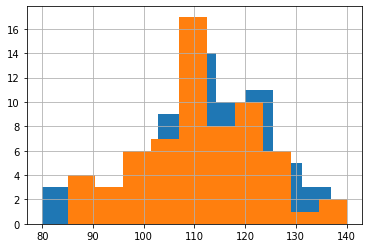

In [6]:
MIAdf.TeamPTS.hist()
OKCdf.TeamPTS.hist()

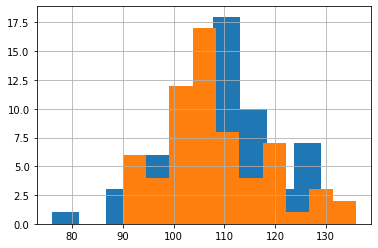

In [7]:
MIAdf.OpponentPTS.hist()
OKCdf.OpponentPTS.hist()

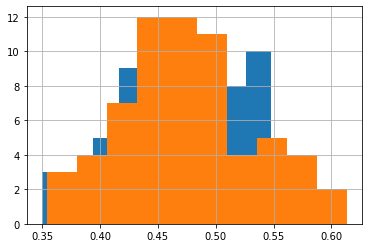

In [8]:
MIAdf.TeamFGP.hist()
OKCdf.TeamFGP.hist()

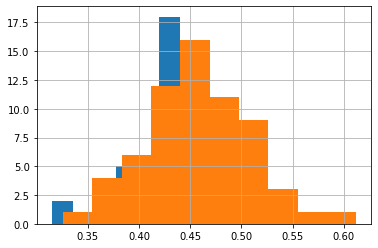

In [9]:
MIAdf.OpponentFGP.hist()
OKCdf.OpponentFGP.hist()

In [10]:
MIAmeanpts = MIAdf.TeamPTS.mean()
OKCmeanpts = OKCdf.TeamPTS.mean()
MIAfgp = MIAdf.TeamFGP.mean()
OKCfgp = OKCdf.TeamFGP.mean()
MIAsdpts = MIAdf.TeamPTS.std()
OKCsdpts = OKCdf.TeamPTS.std()

MIAmeaOKCp = MIAdf.OpponentPTS.mean()
OKCmeaOKCp = OKCdf.OpponentPTS.mean()
MIAfgpopp = MIAdf.OpponentFGP.mean()
OKCfgpopp = OKCdf.OpponentFGP.mean()
MIAsdopp = MIAdf.OpponentPTS.std()
OKCsdopp = OKCdf.OpponentPTS.std()

print("MIA Mean ", MIAmeanpts)
print("MIA FG% ", MIAfgp)
print("MIA Points Standard Deviation ", MIAsdpts)
print("OKC Points Mean ", OKCmeanpts)
print("OKC FG% ", OKCfgp)
print("OKC Points Standard Deviation ", OKCsdpts)

print("MIA OppPoints Mean ", MIAmeaOKCp)
print("MIA OppFG% Mean ", MIAfgpopp)
print("MIA OppPoints SD ", MIAsdopp)
print("OKC OppPoints Mean ", OKCmeaOKCp)
print("OKC OppFG% Mean ", OKCfgpopp)
print("OKC OppPoints SD ", OKCsdopp)

MIA Mean  112.15384615384616
MIA FG%  0.4708461538461537
MIA Points Standard Deviation  12.423806241988062
OKC Points Mean  110.765625
OKC FG%  0.4743125
OKC Points Standard Deviation  11.978475652947415
MIA OppPoints Mean  108.92307692307692
MIA OppFG% Mean  0.4465538461538461
MIA OppPoints SD  10.896254649402032
OKC OppPoints Mean  108.3125
OKC OppFG% Mean  0.45717187500000017
OKC OppPoints SD  10.555785294074676


In [11]:
def gameSim():
    MIAScore = (rnd.gauss(MIAmeanpts,MIAsdpts)+ rnd.gauss(OKCmeaOKCp,OKCsdopp))/2
    OKCScore = (rnd.gauss(OKCmeanpts,OKCsdpts)+ rnd.gauss(OKCmeaOKCp,OKCsdopp))/2
    if int(round(MIAScore)) > int(round(OKCScore)):
        return 1
    elif int(round(MIAScore)) < int(round(OKCScore)):
        return -1
    else: return 0

In [12]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('MIA Win ', team1win/(team1win+team2win),'%')
    print('OKC Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [13]:
gAmesSim(10000)

MIA Win  0.5259834368530021 %
OKC Win  0.4740165631469979 %


[-1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 0,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1